# Plotting separate PTE terms for all simulations 

Ting-Chen Chen (ting-chen.chen@kit.edu) 

In [1]:
dt = 6
data_res  = '1x1latlon'
if   dt == 1:
     data_dt = '1hrly'
elif dt == 6:
     data_dt = '6hrly'
        
p2level = 50
boxsize =  6

In [2]:
#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


expname = {
      1: 'CTL_RH0',    
      2: '4K_RH0',
      3: '4K_RH-',
      4: 'Tanom_RH0',
      5: 'Tanom_TR_RH0',
      6: 'Tanom_PO_RH0'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }


In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import psutil
import datetime
import time as tm
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")

In [4]:
#####################################################
# Read in PTE track data from file
#####################################################
#Cyclone Track
path_track = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/cyclone_PTE_timeseries/'
dur = {}
dp = {}
dfi = {}
ep = {}
itt = {}
eq1res = {}
tadv = {}
vmt = {}
diab = {}
eq2res = {}
diabptend = {}
for i in range(1,7):
    #print(exp80[i])
    ifile    ='PTE_for_'+exp80[i]+'_'+data_dt+'_'+data_res+'_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'.csv'
    df_track = pd.read_csv(path_track+ifile)
    #ntrack = len(df_track['lat']) 
    dur[exp80[i]] = df_track['time']+1
    #lon  = df_track['lon']
    #lat  = df_track['lat'] 
    dp[exp80[i]]        = df_track['dp'] 
    dfi[exp80[i]]       = df_track['dfi']                      
    ep[exp80[i]]        = df_track['ep']    
    itt[exp80[i]]       = df_track['itt'] 
    eq1res[exp80[i]]    = df_track['eq1res']                     
    tadv[exp80[i]]      = df_track['tadv']
    vmt[exp80[i]]       = df_track['vmt']
    diab[exp80[i]]      = df_track['diab']
    eq2res[exp80[i]]    = df_track['eq2res'] 
    diabptend[exp80[i]] = df_track['diabptend'] 

dur[exp80[6]]
                       

0      1.00
1      1.25
2      1.50
3      1.75
4      2.00
5      2.25
6      2.50
7      2.75
8      3.00
9      3.25
10     3.50
11     3.75
12     4.00
13     4.25
14     4.50
15     4.75
16     5.00
17     5.25
18     5.50
19     5.75
20     6.00
21     6.25
22     6.50
23     6.75
24     7.00
25     7.25
26     7.50
27     7.75
28     8.00
29     8.25
30     8.50
31     8.75
32     9.00
33     9.25
34     9.50
35     9.75
36    10.00
Name: time, dtype: float64

# PLOT the time evolution of the cyclone-associated PTE 

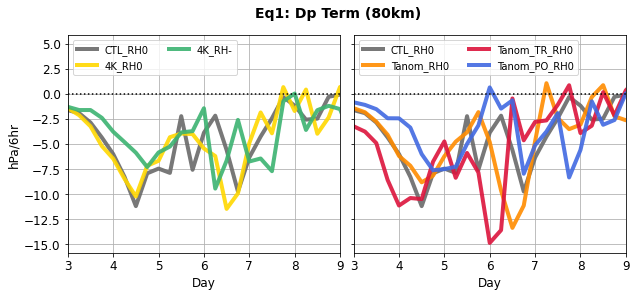

In [ ]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'Dp'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], dp[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], dp[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



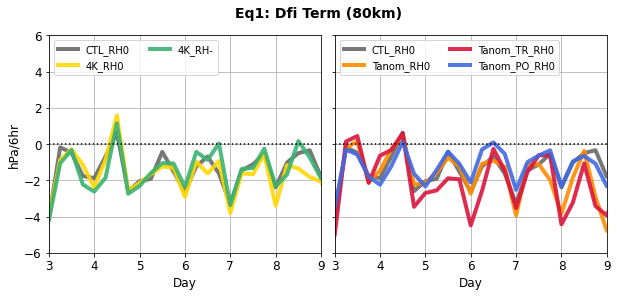

In [185]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'Dfi'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], dfi[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], dfi[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim((-6, 6))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim((-6, 6))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



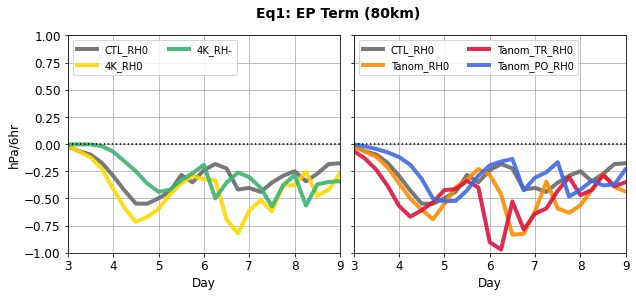

In [189]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'EP'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], ep[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], ep[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim((-1, 1))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim((-1, 1))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



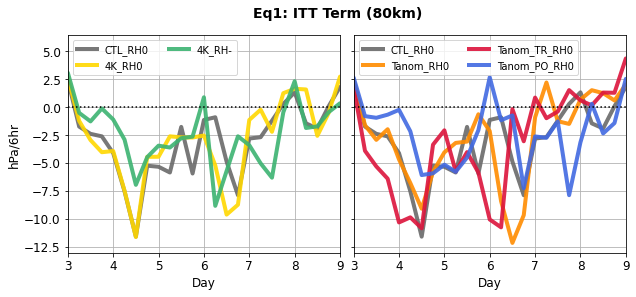

In [190]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'ITT'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], itt[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], itt[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



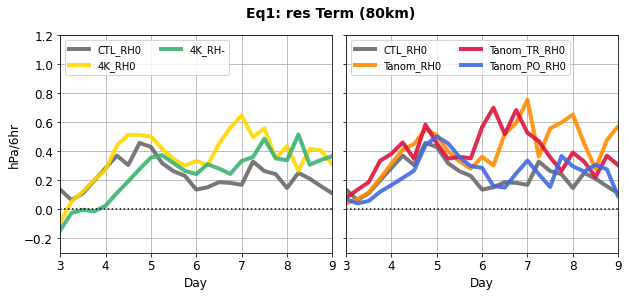

In [213]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'res'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], eq1res[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], eq1res[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim((-0.3, 1.2))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim((-0.3, 1.2))
#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim_eq1'+res+'_eq1'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



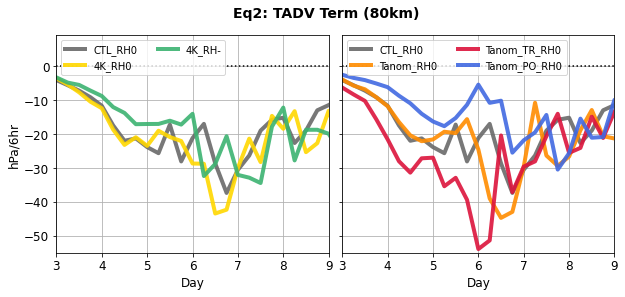

In [210]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'TADV'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], tadv[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], tadv[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-55, 9)
#ax[0].set_ylim((-0.3, 1.2))
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-55, 9)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



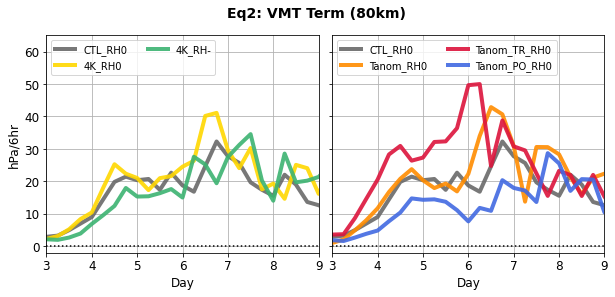

In [199]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'VMT'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], vmt[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], vmt[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-2, 65)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-2, 65)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



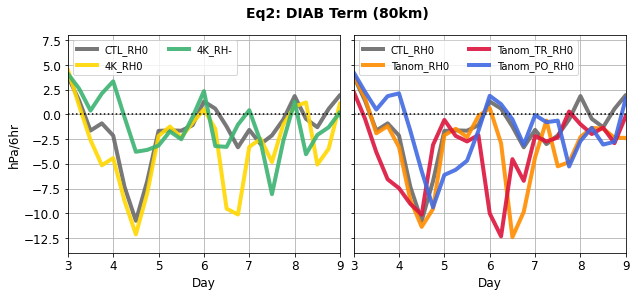

In [202]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'DIAB'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], diab[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], diab[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-14, 8)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-14, 8)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



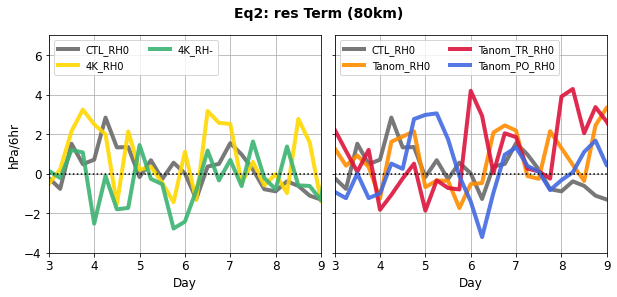

In [212]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'res'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    ax[0].plot(dur[exp80[i]], eq2res[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    ax[1].plot(dur[exp80[i]], eq2res[exp80[i]], color=colors[i],
               linewidth=4, label=expname[i], alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-4, 7)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-4, 7)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_eq2'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



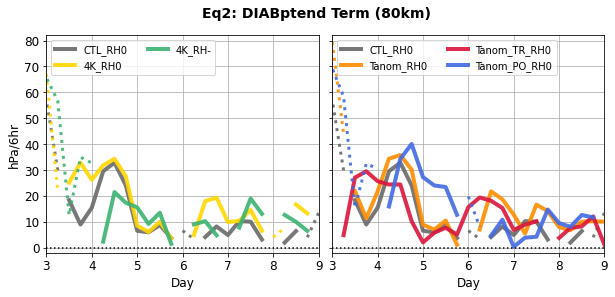

In [207]:
# Separating the two equations #

# Eq.2 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'DIABptend'
res  = '80km'
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)
for i in range(1,4): # loop over simulations
    
    p = diabptend[exp80[i]].copy()
    n = diabptend[exp80[i]].copy()

    p[diab[exp80[i]] >= 0] = np.nan
    n[diab[exp80[i]] < 0]  = np.nan
    ax[0].plot(dur[exp80[i]], p, color=colors[i],
               linestyle='-',linewidth=4, label=expname[i], alpha=0.9)
    ax[0].plot(dur[exp80[i]], n, color=colors[i],
               linestyle=':',linewidth=3, alpha=0.9)

#plt.legend(ncols=3, loc='upper center')
for i in [1,4,5,6]: # loop over simulations
    p = diabptend[exp80[i]].copy()
    n = diabptend[exp80[i]].copy()

    p[diab[exp80[i]] >= 0] = np.nan
    n[diab[exp80[i]] < 0]  = np.nan
    ax[1].plot(dur[exp80[i]],p, color=colors[i],
               linestyle='-',linewidth=4, label=expname[i], alpha=0.9)
    ax[1].plot(dur[exp80[i]],n, color=colors[i],
               linestyle=':',linewidth=3, alpha=0.9)  
#plt.legend(ncols=3, loc='upper center')
#ax = df_track[['dfi', 'ep','itt', 'eq1res']].plot(kind='bar', stacked=True, title='', color=col_pte, figsize=(6, 3))
#df_track.plot(x ='Unnamed: 0', y='dp', kind = 'line', ax=ax, color='k', linewidth='3')

ax[0].set_xlabel('Day', fontsize=12)
ax[0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0].set_xlim((3, 9))
ax[0].set_ylim(-2, 82)
ax[1].set_xlabel('Day', fontsize=12)
#ax[1].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1].set_xlim((3, 9))
ax[1].set_ylim(-2, 82)

#ax.set_xticks(np.arange(9, 32, 2))
#ax.set_xticklabels(dur[exp80[i]].to_numpy())
#print(dur[exp80[i]])
#ax.set_xlim(np.min(df_track['Unnamed: 0'])-0.5, np.max(df_track['Unnamed: 0']+0.5))
   #ax.set_xticklabels(df_track['time'])
ax[0].yaxis.grid()
ax[1].yaxis.grid()
ax[0].xaxis.grid()
ax[1].xaxis.grid()
ax[0].axhline(y=0,linestyle=':', color='k')
ax[1].axhline(y=0,linestyle=':', color='k')
ax[0].legend(ncol=2, loc='upper left')
ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.05)
fig.suptitle('Eq2: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Allsim'+res+'_'+term+'.png',
               bbox_inches='tight',dpi=100)
plt.show()



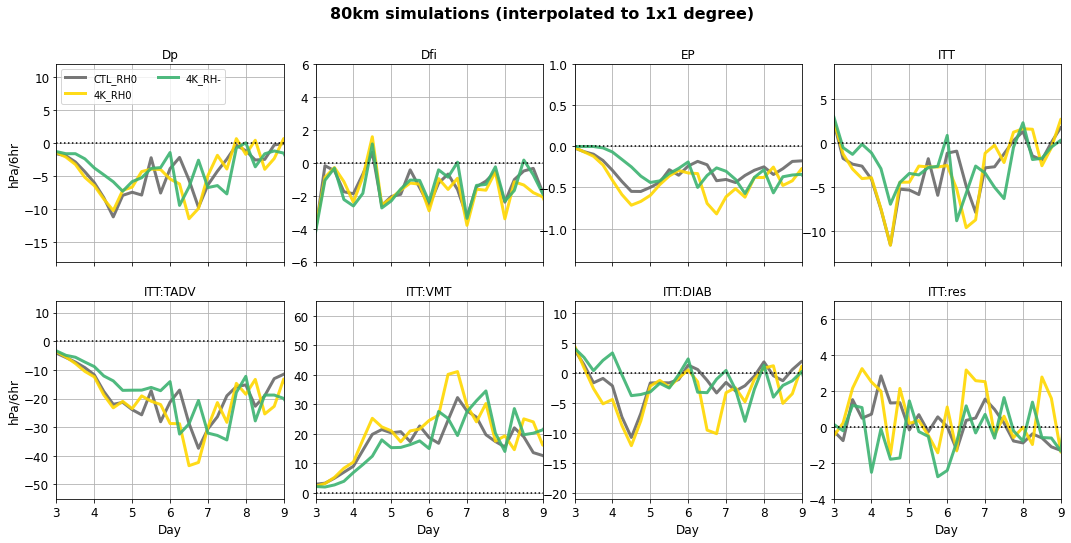

In [9]:
# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'All'
res  = '80km'
fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,4): # loop over simulations
    ax[0,0].plot(dur[exp80[i]], dp[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,1].plot(dur[exp80[i]], dfi[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,2].plot(dur[exp80[i]], ep[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,3].plot(dur[exp80[i]], itt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,0].plot(dur[exp80[i]], tadv[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,1].plot(dur[exp80[i]], vmt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,2].plot(dur[exp80[i]], diab[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,3].plot(dur[exp80[i]], eq2res[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')


ax[0,0].set_ylim((-18, 12))
ax[0,1].set_ylim((-6, 6))
ax[0,2].set_ylim((-1.4, 1))
ax[0,3].set_ylim((-13.5, 9))
ax[1,0].set_ylim(-55, 14)
ax[1,1].set_ylim(-2, 65)
ax[1,2].set_ylim(-21, 12)
ax[1,3].set_ylim(-4, 7)

ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=2, loc='upper left')
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle(''+res+' simulations (interpolated to 1x1 degree)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Sim123_'+res+'_Allterms_in_onefig.png',
               bbox_inches='tight',dpi=100)
plt.show()



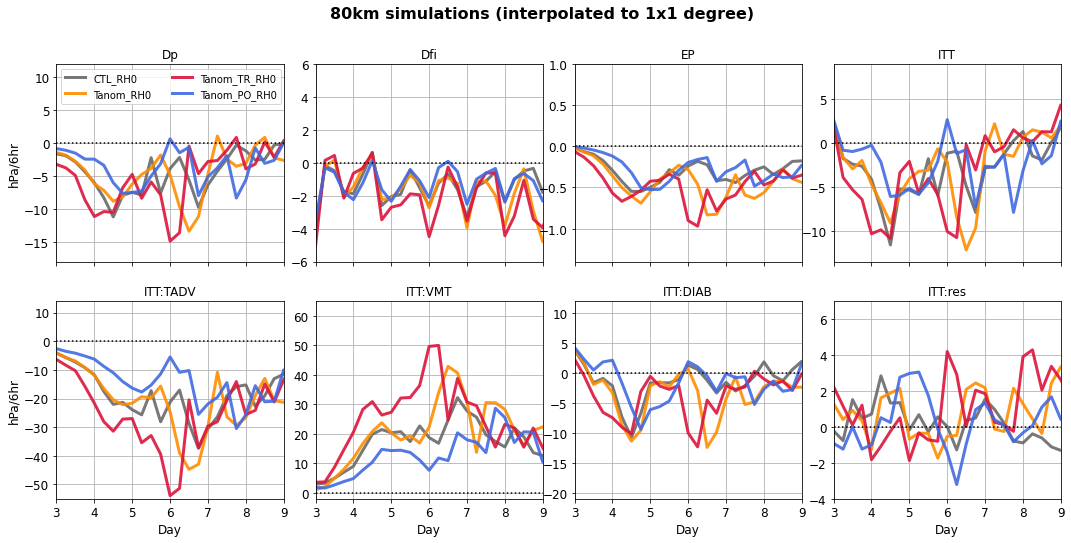

In [10]:
# Separating the two equations #

# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]
colors={1:'dimgray',2:'gold',3:'mediumseagreen',4:'darkorange',5:'crimson',6:'royalblue'}

term = 'All'
res  = '80km'
fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in [1,4,5,6]: # loop over simulations
    ax[0,0].plot(dur[exp80[i]], dp[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,1].plot(dur[exp80[i]], dfi[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,2].plot(dur[exp80[i]], ep[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[0,3].plot(dur[exp80[i]], itt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,0].plot(dur[exp80[i]], tadv[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,1].plot(dur[exp80[i]], vmt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,2].plot(dur[exp80[i]], diab[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    ax[1,3].plot(dur[exp80[i]], eq2res[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.9)
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')


ax[0,0].set_ylim((-18, 12))
ax[0,1].set_ylim((-6, 6))
ax[0,2].set_ylim((-1.4, 1))
ax[0,3].set_ylim((-13.5, 9))
ax[1,0].set_ylim(-55, 14)
ax[1,1].set_ylim(-2, 65)
ax[1,2].set_ylim(-21, 12)
ax[1,3].set_ylim(-4, 7)

ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=2, loc='upper left')
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle(''+res+' simulations (interpolated to 1x1 degree)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('CyclonePTEtimeseries_Sim1456_'+res+'_Allterms_in_onefig.png',
               bbox_inches='tight',dpi=100)
plt.show()



#### 